In [131]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *

import matplotlib as mpl
%matplotlib inline

COLUMN_WIDTH = 3.25  # Inches
TEXT_WIDTH = 6.299213  # Inches
GOLDEN_RATIO = 1.61803398875
DPI = 300
FONT_SIZE = 12

mpl.rcParams['font.size'] = FONT_SIZE
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times']
# mpl.rcParams['text.usetex'] = True

mpl.rcParams['text.usetex'] = False

In [147]:
def plot_accuracy(R_1:np.array, R_2:np.array, f_1, f_2, p_1, p_2) -> None:
    num_samples = 100
    X_1 = np.arange(R_1[0], R_1[1], (R_1[1] - R_1[0]) / num_samples)
    X_2 = np.arange(R_2[0], R_2[1], (R_2[1] - R_2[0]) / num_samples)
    acc_1 = np.array([f_1(x) for x in X_1])
    acc_2 = np.array([f_2(x) for x in X_2])
    plt.plot(X_1, acc_1, color = 'r')
    plt.plot(X_2, acc_2, color = 'b')
    plt.axvline(x=R_1[1], color='k', linestyle='dashed')
    plt.ylim(0,1)
    plt.text(X_1.mean(), -0.15,'$R_1, p_1=%.1f$' % p_1, horizontalalignment='center')
    plt.text(X_2.mean(), -0.15,'$R_2, p_2=%.1f$' % p_2, horizontalalignment='center')
    plt.ylabel('accuracy')
    plt.show()
    
    
def plot_split_variance(overall_acc:np.array, split:np.array, num_runs:int, num_samples:int):
    """
    overall_acc: np.array(num_runs, num_split)
    split: np.array(num_split)
    """
    y_mean = overall_acc.mean(axis=0)
    y_var = overall_acc.std(axis=0)
    plt.plot(split, y_mean, color='b')
    plt.fill_between(split, y_mean - y_var, y_mean + y_var,
                 color='gray', alpha=0.2)
    plt.xlabel('proportion of samples from R_1')
    plt.ylabel('estimated overall accuracy')
    plt.title('%d samples, %d runs' % (num_samples, num_runs))
    plt.ylim(0,1)
    plt.show()

In [120]:
def sample(R, f) -> bool:
    # Assume X is uniformly distributed over R, draw one sample
    x = np.random.uniform(R[0],R[1])
    acc = f(x)
    return np.random.uniform() < acc

def sample_acc(R, f, num_samples):
    samples = np.array([sample(R, f)*1.0 for i in range(num_samples)])
    return samples.mean()

def estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples):
    overall_acc = np.zeros((num_runs, len(split)))
    for run_idx in range(num_runs):
        for p_idx, p in enumerate(split):
            n_1 = int(num_samples * p)
            n_2 = int(num_samples * (1 - p))
            acc_1 = sample_acc(R_1, f_1, n_1)
            acc_2 = sample_acc(R_2, f_2, n_2)
            overall_acc[run_idx, p_idx] = p_1 * acc_1 + p_2 * acc_2
    return overall_acc

# Constant accuracy for each region

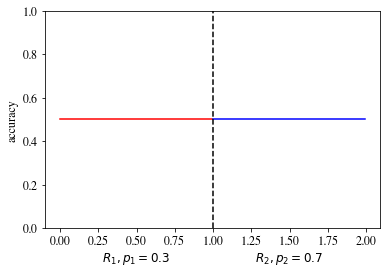

/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':


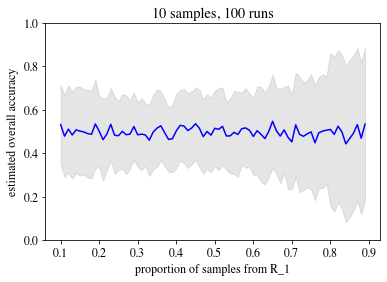

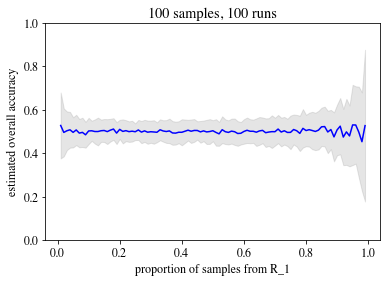

In [149]:
# Scenario 1:
R_1 = np.array([0, 1])
f_1 = lambda x: 0.5
R_2 = np.array([1, 2])
f_2 = lambda x: 0.5

p_1, p_2 = 0.3, 0.7
plot_accuracy(R_1, R_2, f_1, f_2, p_1, p_2)

# Consider in the batch scenario, how does variance change as the labeling budget assigned 
split = np.arange(0, 1, 0.01).tolist()
num_runs, num_samples = 100, 10
overall_acc = estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples)
plot_split_variance(overall_acc, split, num_runs, num_samples)
num_runs, num_samples = 100, 100
overall_acc = estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples)
plot_split_variance(overall_acc, split, num_runs, num_samples)

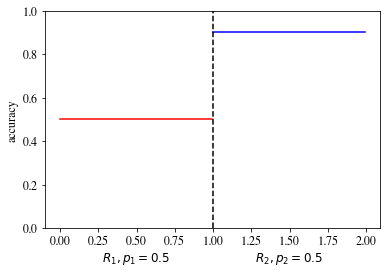

/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':


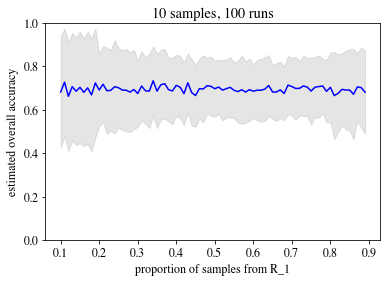

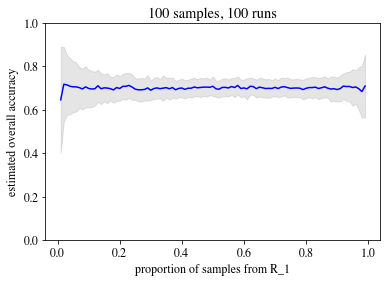

In [148]:
# Scenario 2:
R_1 = np.array([0, 1])
f_1 = lambda x: 0.5
R_2 = np.array([1, 2])
f_2 = lambda x: 0.9
p_1, p_2 = 0.5, 0.5

plot_accuracy(R_1, R_2, f_1, f_2, p_1, p_2)

split = np.arange(0, 1, 0.01).tolist()
num_runs, num_samples = 100, 10
overall_acc = estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples)
plot_split_variance(overall_acc, split, num_runs, num_samples)
num_runs, num_samples = 100, 100
overall_acc = estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples)
plot_split_variance(overall_acc, split, num_runs, num_samples)

# One region has higher variance in accuracy

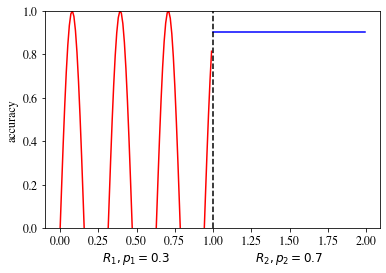

/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':


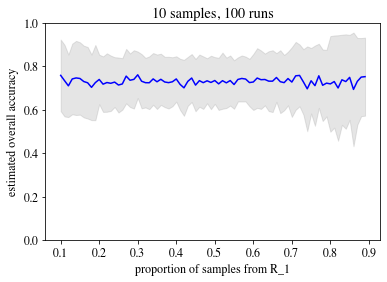

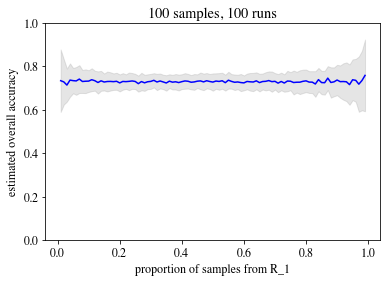

In [150]:
# Scenario 2:
R_1 = np.array([0, 1])
f_1 = lambda x: sin(x * 20)
R_2 = np.array([1, 2])
f_2 = lambda x: 0.9
p_1, p_2 = 0.3, 0.7

plot_accuracy(R_1, R_2, f_1, f_2, p_1, p_2)

split = np.arange(0, 1, 0.01).tolist()
num_runs, num_samples = 100, 10
overall_acc = estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples)
plot_split_variance(overall_acc, split, num_runs, num_samples)
num_runs, num_samples = 100, 100
overall_acc = estiamte_overall_acc(split, R_1, R_2, f_1, f_2, p_1, p_2, num_runs, num_samples)
plot_split_variance(overall_acc, split, num_runs, num_samples)